# 梯度下降法

# 一.算法原理

梯度下降法（Gradient Descent Method）是一种属于求解最优化问题的算法，是求解无约束多元函数极值的数值算法。例如，在数值计算的迭代法中，若迭代能够收敛（即误差能够收敛于0）时，误差向负梯度方向变化的收敛速度最快。

## 1.凸集与凸函数

### （1）凸集：$\forall \alpha\in [0,1],\forall x_1,x_2\in X\subset R^n,\quad\alpha x_1+(1-\alpha) x_2\in X$

#### 超平面：

$$\{x\in X|c^Tx=b\}$$
其中$c\in R^n,b\in R$.超平面将凸集分为两部分。同样$R^n$也有超平面，且每个超平面属于$R^{n-1}$。

#### 支撑超平面：

$$\{x\in X|c^Tw=b,w\in \partial(X), c^Tx\leqslant b(\forall x\in X)\}$$
或$$\{x\in X|c^Tw=b,w\in \partial(X), c^Tx\geqslant b( \forall x\in X)\}$$凸集中所有点都位于该超平面及其一侧。

#### 凸集分离定理：

若$X_1,X_2$为凸集且$X_1\cap X_2=\varnothing$，则存在$p\in R^n,p\neq 0$及$q\in R$，确定超平面$H=\{x\in R^n|p^Tx=q\}$，使得$$X_1\subset H^-= \{x\in R^n|p^Tx\leqslant q\}$$
$$X_2\subset H^+= \{x\in R^n|p^Tx\geqslant q\}$$

### （2）凸函数

凸函数具有很多很好的性质：

a.任一局部极小（大）值也是全局极小（大）值，且全体极小（大）值之集为凸集；

b.任一局部最优解（满意解）都是整体最优解（最优解）。
* 凸函数有不同定义，这里的凸函数特指下凸函数

## 2.梯度下降

函数$f(x)$的梯度定义为：$$\nabla f(x)=\left(\begin{matrix}
\frac{\partial f}{\partial x_1}\\
\cdot\\
\cdot\\
\cdot\\
\frac{\partial f}{\partial x_n}
\end{matrix}\right)$$
其中$x=(x_1,\cdots,x_n)^T\in R^n$。
易知，若$f(x)$为凸函数时，随机从某点出发，利用迭代法求$f(x)$最大(小)值，则向梯度（负梯度）方向迭代最快收敛。

梯度是一个向量，为我们提供了函数值变化的方向和强度，我们还可以为其指定迭代步长的倍数。迭代步长同样会影响算法的收敛性及收敛速度。

## 3.线性分类器

线性分类器先应用公式$$f(x)=w^T x+b\qquad w\in R^n$$或$$f(X)=w^TX\qquad\quad w\in R^{n+1}$$（其中$w,b$待定，$x=(x_1,\cdots,x_n)^T,X=(1,x_1,\cdots,x_n)^T$）将高维样本点$x\in R^n$映射到$R$,再通过激活函数根据$f(x)$的值进行分类。

激活函数是先选定的，本文使用了最早出现的硬限制函数和$Logistic$函数。

在给定训练集的情况下，即$x$已知时，$f(X)$化为$$g(w)=w^TX$$线性分类器训练的过程其实就是确定函数$g(w)$分类最优时（分类误差函数$error(w)$最小时）对应的参数$w$：$$\arg\min\limits_{w}error(w)$$而迭代过程所用到算法就是梯度下降法，其梯度即为分类器对训练集的分类误差（元素为1，0，-1的向量）。

# 二.算法流程

## 1.导入数据

In [1]:
from numpy import *

# 数据文件转矩阵
# path: 数据文件路径
# delimiter: 文件分隔符
def file2matrix(path,delimiter):	
	recordlist = []
	fp = open(path,"rb") 	# 读取文件内容
	content = fp.read()
	fp.close()
	rowlist = content.splitlines() 	# 按行转换为一维表
	# 逐行遍历 		# 结果按分隔符分割为行向量
	recordlist=[map(eval, row.split(delimiter)) for row in rowlist if row.strip()]	
	return mat(recordlist)	# 返回转换后的矩阵形式
    
Input=file2matrix("testSet.txt","\t")
target=Input[:,-1]
[m,n]=shape(Input)

导入数据部分结果如下：

In [4]:
Input[1:6,:]

matrix([[ -1.395634,  -4.662541,   1.      ],
        [ -0.752157,  -6.53862 ,   0.      ],
        [ -1.322371,  -7.152853,   0.      ],
        [  0.423363, -11.054677,   0.      ],
        [  0.406704,  -7.067335,   1.      ]])

## 2.按分类绘制散点图

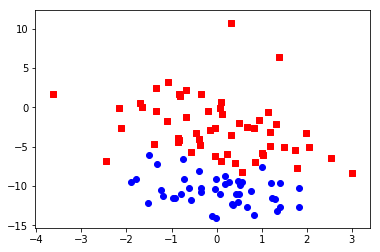

In [17]:
import matplotlib.pyplot as plt 

def drawScatter(plt,Input):
    m,n=shape(Input)
    target=Input[:,-1]
    for i in xrange(m):
        if target[i]==0:
            plt.scatter(Input[i,0],Input[i,1],c='blue',marker='o')
        else:
            plt.scatter(Input[i,0],Input[i,1],c='red',marker='s')
            
plt.figure()
drawScatter(plt,Input)
plt.show()

## 3.构建输入矩阵

输入矩阵的第一列为预测列$b$,且不带原标签列。初始化时可取$b$中元素全为$1$。

In [22]:
def buildMat(dataSet):
    m,n=shape(dataSet)
    dataMat=zeros((m,n))
    dataMat[:,0]=1
    dataMat[:,1:]=dataSet[:,:-1]
    return dataMat
          
dataMat=buildMat(Input)

输入矩阵的部分数据如下：

In [24]:
dataMat[1:6,:]

array([[  1.      ,  -1.395634,  -4.662541],
       [  1.      ,  -0.752157,  -6.53862 ],
       [  1.      ,  -1.322371,  -7.152853],
       [  1.      ,   0.423363, -11.054677],
       [  1.      ,   0.406704,  -7.067335]])

## 4.定义步长和迭代次数，并初始化权重向量

In [60]:
alpha=0.001
steps=500
weights1=ones((n,1))
weights2=ones((n,1))

## 5.主程序：激活函数迭代过程

### （1）硬限幅（$hard\ limiting/hard\ threshold$）函数

较简单的硬限幅函数：$$f(x)=\begin{cases}
0,&x<0\\
1,&x \geqslant 0
\end{cases}$$

In [51]:
def hardlim(dataSet):
    dataSet[nonzero(dataSet.A>0)[0]]=1
    dataSet[nonzero(dataSet.A<=0)[0]]=0
    return dataSet

for k in xrange(steps):
    gradient=dataMat*mat(weights1)           # 梯度
    output=hardlim(gradient)                 # 调用硬限幅函数判断
    errors=target-output                     # 计算误差
    weights1=weights1+alpha*dataMat.T*errors # 修正线性系数

### （2）$Logistic$函数

上述分段函数在零点附近从0突变为1，没有过渡状态，目标函数容易发生震荡，实践中经常用0~1之间的概率输出，以提供平缓的分类决策边界。$$Logistic(X)=\frac{1}{1+e^{-w^TX}}$$当$X$某一分量从$-\infty$变化到$+\infty$时，该分量对应的取值从0渐变到1，$Logistic$函数为偶函数且$Logistic(0)=\frac{1}{2}$，因此对二分类问题的预测，可以通过比较预测样本的分类器预测值和$\frac{1}{2}$的大小来进行分类。

In [34]:
def logistic(x):
    return 1.0/(1.0+exp(-x))
    
for k in xrange(steps):
    gradient=dataMat*mat(weights2)           # 梯度
    output=logistic(gradient)                # 调用Logistic函数判断
    errors=target-output                     # 计算误差
    weights2=weights2+alpha*dataMat.T*errors # 修正线性系数

## 6.绘制分类超平面

设$w=(w_0,\cdots,w_n)^T$，则超平面为$$w^TX=w_0+w_1x_1+\cdots+w_nx_n=0$$
当$w_n\neq 0$时，$$x_n=\frac{w_0+w_1x_1+\cdots+w_nx_n}{w_n}$$
特别地，$n=2$时，$$x_2=\frac{w_0+w_1x_1}{w_2}$$因此可绘制如下分类图（纵坐标为$x_2$，横坐标为$x_1$）：

### （1）硬限幅函数训练集分类效果

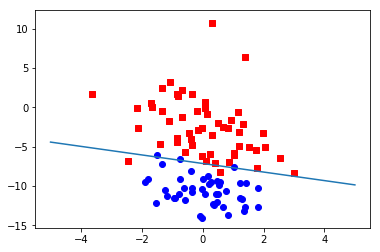

In [33]:
X=linspace(-5,5,100)
Y=-(double(weights1[0])+X*(double(weights1[1])))/double(weights1[2])
drawScatter(plt,Input)
plt.plot(X,Y)
plt.show()

### （2）$Logistic$函数训练集分类效果

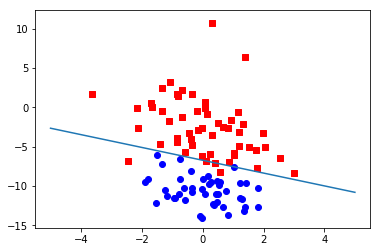

In [37]:
plt.figure()
drawScatter(plt,Input)
X=linspace(-5,5,100)
Y=-(double(weights2[0])+X*(double(weights2[1])))/double(weights2[2])
plt.plot(X,Y)
plt.show()

## 7.对测试集进行分类

In [40]:
testdata=mat([-0.147324,2.874846])
test=zeros((1,3))
test[:,0]=1
test[:,1:]=testdata

### （1）硬限幅函数测试集分类

In [57]:
def classifier1(testData,weights):
    return hardlim(testData*weights).A[0][0]

classifier1(test,weights1)

1.0

### （2）$Logistic$函数测试集分类

In [42]:
def classifier2(testData,weights):
    prob=logistic(sum(testData*weights))
    if prob>0.5:
        return 1.0
    else:        
        return 0.0

classifier2(test,weights2)

1.0

# 三.算法分析

## 1.超平面分析

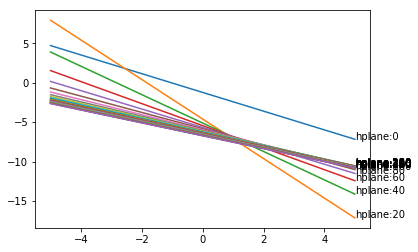

In [61]:
weightslist=[]
for k in xrange(steps):
    gradient=dataMat*mat(weights2)           # 梯度
    output=logistic(gradient)                # 调用Logistic函数判断
    errors=target-output                     # 计算误差
    weights2=weights2+alpha*dataMat.T*errors # 修正线性系数
    weightslist.append(weights2)
    
plt.figure()
X=linspace(-5,5,100)
len_weights=len(weightslist)
for index in xrange(len_weights):
    if index%20==0:
        weight=weightslist[index]
        Y=-(double(weight[0])+X*(double(weight[1])))/double(weight[2])
        plt.plot(X,Y)
        plt.annotate("hplane:"+str(index),xy=(X[99],Y[99]))
plt.show()

## 2.斜率和截距分析

#### 截距：

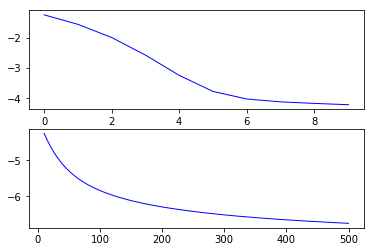

In [67]:
fig=plt.figure()
axes1=plt.subplot(211)
axes2=plt.subplot(212)
weightmat=mat(zeros((steps,n)))
i=0
for weight in weightslist:
    weightmat[i,:]=weight.T
    i+=1
X=linspace(0,steps,steps)
axes1.plot(X[0:10],-weightmat[0:10,0]/weightmat[0:10,2],color='blue',linewidth=1,linestyle='-')
axes2.plot(X[10:],-weightmat[10:,0]/weightmat[10:,2],color='blue',linewidth=1,linestyle='-')
plt.show()

#### 斜率：

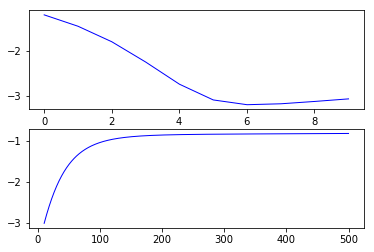

In [69]:
plt.figure()
axes1=plt.subplot(211)
axes2=plt.subplot(212)
axes1.plot(X[0:10],-weightmat[0:10,1]/weightmat[0:10,2],color='blue',linewidth=1,linestyle='-')
axes2.plot(X[10:],-weightmat[10:,1]/weightmat[10:,2],color='blue',linewidth=1,linestyle='-')
plt.show()

## 3.系数/权重收敛评估

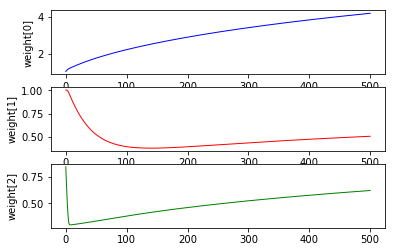

In [75]:
plt.figure()
axes1=plt.subplot(311)
axes2=plt.subplot(312)
axes3=plt.subplot(313)
axes1.plot(X,weightmat[:,0],color='blue',linewidth=1,linestyle='-')
axes1.set_ylabel('weight[0]')
axes2.plot(X,weightmat[:,1],color='red',linewidth=1,linestyle='-')
axes2.set_ylabel('weight[1]')
axes3.plot(X,weightmat[:,2],color='green',linewidth=1,linestyle='-')
axes3.set_ylabel('weight[2]')
plt.show()

## 4.算法总体评价

从上述图像可以看出，超平面变化趋于稳定；斜率变化已到达平稳状态，但截距在第10~500次迭代过程变化仍剧烈，未达到平稳；各参数变化趋势不明显。应该进一步增加迭代次数，使截距参数最终达到平稳，此时的超平面决策边界才是最优的。